# GATE output formats and Python

## GATE can output information in different formats:
* ASCII output
* Binary output
* Images (mhd, hdr) output
* ROOT tree output
* NumPy tree output (new!)

From actors https://opengate.readthedocs.io/en/latest/tools_to_interact_with_the_simulation_actors.html

and from "systems" (scanner, CT, SPECT, PET, ...) https://opengate.readthedocs.io/en/latest/data_output_management.html

detail more the gate outputs per actors and systems, summarise the type of outputs,
and then example tu run to get outputs and read them

We will first have a look at a GATE example to understand these outputs

Run the example Ex_beam

Analyse the outputs with this Python notebook

# GATE ASCII output


## 1D DoseActor (along Z)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data from txt files
d_edep = np.loadtxt('Ex_Beam/output/1D-depth-Edep.txt')
d_uncert = np.loadtxt('Ex_Beam/output/1D-depth-Edep-Uncertainty.txt')

## Plot depth dose and uncertainty

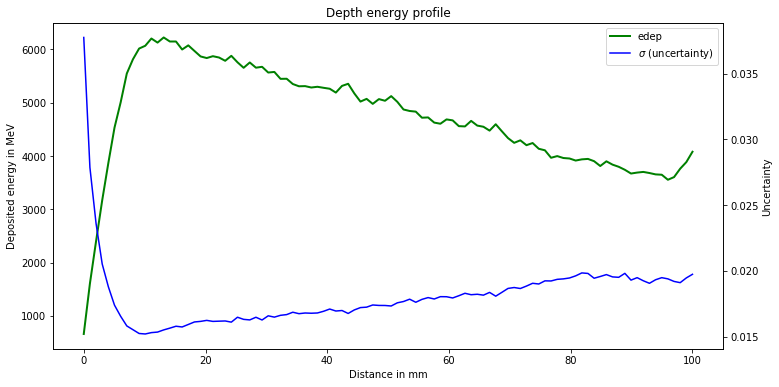

In [3]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# X values from 0 to n
# n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth energy profile')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

# GATE image output

## 3D DoseActor - format mhd/raw

In [4]:
import SimpleITK as sitk

img_dose = sitk.ReadImage('Ex_Beam/output/3D-Edep.mhd')
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 2264.5


In [5]:
arr_dose

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.28146961e-01, 1.59078464e-01, 0.00000000e+00],
        [4.74147266e-03, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.61502059e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.99060634e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.05122861e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

## Exercise
* make the same plot as previous section with this 3D data
* make a profile plot
* display a slice of the 3D data with plt.imshow (optional)

## Solution

In [ ]:
p_edep = arr_dose.sum(axis=(2,1))
plt.plot(p_edep)

In [ ]:
p_edep = arr_dose.sum(axis=(0,1))
plt.plot(p_edep)

In [ ]:
plt.imshow(arr_dose.sum(axis=0))

# GATE list of interactions

## Binary format

In [6]:
import numpy as np

# dtype line format for "scanner" GATE system binary output (26 columns)
dt=np.dtype([('run_ID', np.int32), ('event_ID', np.int32), ('primary_ID', np.int32), ('source_ID', np.int32), 
             ('level1_ID', np.int32), ('level2_ID', np.int32), ('level3_ID', np.int32), ('level4_ID', np.int32), 
             ('level5_ID', np.int32), ('layer0_ID', np.int32), ('layer1_ID', np.int32), 
             ('time', np.float64), ('energy', np.float64), ('range', np.float64), 
             ('x', np.float64), ('y', np.float64), ('z', np.float64), 
             ('G4code', np.int32), ('particle_ID', np.int32), ('mother_particle_ID', np.int32), ('photon_mother_ID', np.int32), 
             ('n_Compt', np.int32), ('n_Rayl', np.int32), 
             ('process', np.dtype('S8')), ('vol_Compt', np.dtype('S8')), ('vol_Rayl', np.dtype('S8'))])

data=np.fromfile('Ex_Beam/output/list-Hits.bin', dtype=dt)
print('Number of particles:', len(data))
data

Number of particles: 60300


array([(0,     9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.00002857e-04, 4.27473101, 0.51712216,  45.35125958,  -2.14465462, 449.99260566, 22, 1, 0, 0, 0, 0, b'compt', b'NULL', b'NULL'),
       (0,    14, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1.50004401e-04, 0.04707832, 0.82900913, -30.19074817,  -7.57762113, 450.30375121, 22, 7, 3, 2, 0, 0, b'phot', b'NULL', b'NULL'),
       (0,    25, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2.60002974e-04, 0.05076265, 0.04427933,  56.75395299,  74.68905714, 449.54347595, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'NULL'),
       ...,
       (0, 99960, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99610003e-01, 0.06841858, 0.04605562, -42.32305323,  84.63546728, 449.54520156, 22, 4, 3, 2, 0, 0, b'phot', b'NULL', b'NULL'),
       (0, 99983, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99840004e-01, 0.03207111, 0.08907771, 155.15247176, 171.9083644 , 449.57665451, 22, 4, 3, 0, 0, 0, b'phot', b'NULL', b'NULL'),
       (0, 99998, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9.99990003e-01, 7.94104882, 0.01358886,   0.99512485,  -1.8314023 , 449.

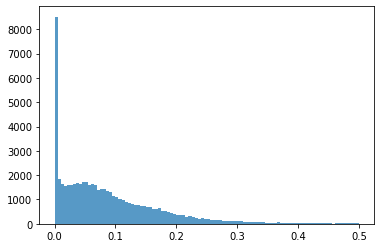

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## Exercise  
* select and print only data corresponding to the process 'phot'
* plot the corresponding energy histogram
* explain the energy spectrum (increase the number of primaries if necessary)

## Solution

In [ ]:
print(data[data['process'] == b'phot'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data[data['process'] == b'phot']['energy']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

## GATE ROOT Tree output

In [8]:
import uproot

f = uproot.open('Ex_Beam/output/tree.hits.root')

# all trees, branches and leaves names are accessible through the method keys()
print('Trees in the file:')
print(f.keys())
print()
print('Leaves (variables) in the Tree:')
print(f['tree'].keys())

# all variables are accessible through the method arrays()
data = f['tree'].arrays()

print()
print('Number of particles:', len(data[b'trackID']))

Trees in the file:
[b'tree;1']

Leaves (variables) in the Tree:
[b'PDGEncoding', b'trackID', b'parentID', b'trackLocalTime', b'time', b'runID', b'eventID', b'sourceID', b'primaryID', b'posX', b'posY', b'posZ', b'localPosX', b'localPosY', b'localPosZ', b'momDirX', b'momDirY', b'momDirZ', b'edep', b'stepLength', b'trackLength', b'rotationAngle', b'axialPos', b'processName', b'comptVolName', b'RayleighVolName', b'volumeID[0]', b'volumeID[1]', b'volumeID[2]', b'volumeID[3]', b'volumeID[4]', b'volumeID[5]', b'volumeID[6]', b'volumeID[7]', b'volumeID[8]', b'volumeID[9]', b'sourcePosX', b'sourcePosY', b'sourcePosZ', b'nPhantomCompton', b'nCrystalCompton', b'nPhantomRayleigh', b'nCrystalRayleigh', b'', b'level1ID', b'level2ID', b'level3ID', b'level4ID', b'level5ID', b'photonID']

Number of particles: 60300


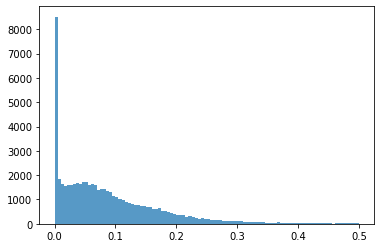

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data[b'edep']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

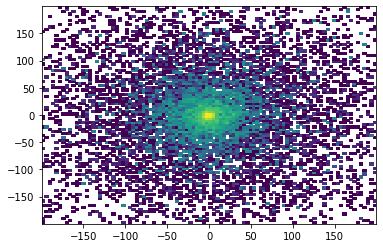

In [10]:
from matplotlib.colors import LogNorm

# Plot the particle positions
x = data[b'posX']
y = data[b'posY']

# fig = plt.scatter(x, y, alpha=0.75)
fig = plt.hist2d(x, y, bins=100, norm=LogNorm())

## GATE Numpy Tree output - New !
GATE simulations can now output information on interactions occuring in a detector in a new format: the NumPy .npy Python format. This as several advantages:
* data is easily open in Python.
* data is saved as a [Structured Arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) which makes the access to variables very easy.

In [11]:
import numpy as np

data = np.load('Ex_Beam/output/tree.hits.npy')

print('Number of particles:', len(data))
data

Number of particles: 60300


array([(22, 1, 0, 2.85743680e-09, 1.00002857e-04, 0,     9, 0, 1,  45.35126  ,  -2.1446545, 449.9926 ,  45.35126  ,  -2.1446545, -0.00739434, -0.36879066,  0.7364746 , 0.5670967 , 4.274731  , 0.51712215, 856.638  , 0., 450., b'compt', b'NULL', b'NULL', 0, 1, -1, -1, -1, -1, -1, -1, -1, -1, 3.0721486,  3.448915  , -400., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (22, 7, 3, 2.14625296e-09, 1.50004401e-04, 0,    14, 0, 1, -30.190748 ,  -7.577621 , 450.30374, -30.190748 ,  -7.577621 ,  0.3037512 ,  0.01867924,  0.24424991, 0.9695324 , 0.04707832, 0.8290091 , 643.4305 , 0., 450., b'phot', b'NULL', b'NULL', 0, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1.2191304,  1.855207  , -400., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2),
       (22, 4, 3, 1.40367360e-09, 2.60002974e-04, 0,    25, 0, 1,  56.753952 ,  74.68906  , 449.5435 ,  56.753952 ,  74.68906  , -0.45652404,  0.18627918,  0.03546698, 0.98185647, 0.05076265, 0.04427933, 420.81076, 0., 450., b'phot', b'NULL', b'NULL', 0, 1, -1, -1, -1, -1, -1, -1, -1, -1,

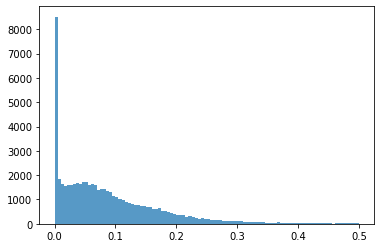

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the energy histogram
x = data['edep']

n, bins, patches = plt.hist(x, bins=100, range=[0,0.5], alpha=0.75)

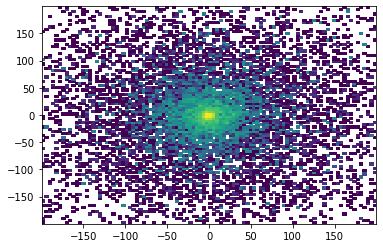

In [13]:
from matplotlib.colors import LogNorm

# Plot the particle positions
x = data['posX']
y = data['posY']

# fig = plt.scatter(x, y, alpha=0.75)
fig = plt.hist2d(x, y, bins=100, norm=LogNorm())